In [38]:
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report



from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

In [39]:
df = pd.read_csv(r'C:\Users\Sazgar\Desktop\DataSets\churn.csv')

In [40]:
df.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5136,Male,1,No,No,2,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,72.60,154.3,No
2713,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.45,20.45,No
3520,Female,0,Yes,No,16,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.60,314.45,No
6116,Female,0,No,No,48,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,One year,Yes,Bank transfer (automatic),73.85,3581.4,No
2725,Female,0,No,No,2,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,No,Electronic check,24.50,46.4,No


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [42]:
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [43]:
df['TotalCharges'].value_counts()

          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6531, dtype: int64

In [44]:
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors = 'coerce')

In [45]:
df = df.dropna()

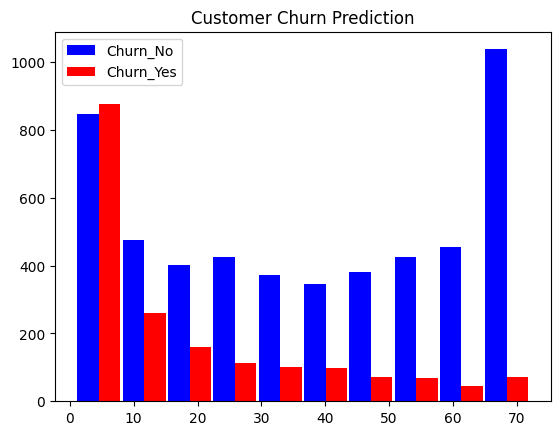

In [46]:
tenure_no = df[df.Churn == 'No'].tenure
tenure_yes = df[df.Churn == 'Yes'].tenure

plt.hist([tenure_no, tenure_yes], rwidth = 0.95, color =['blue', 'red'], label=['Churn_No', 'Churn_Yes'])
plt.title('Customer Churn Prediction')
plt.legend()
plt.show()

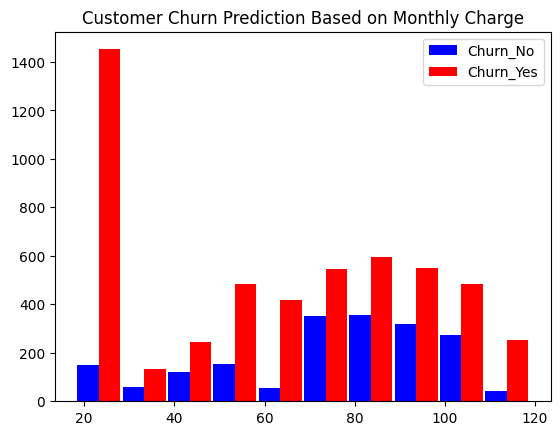

In [47]:
charge_churn_yes = df[df.Churn == 'Yes'].MonthlyCharges
charge_churn_no = df[df.Churn == 'No'].MonthlyCharges


plt.hist([charge_churn_yes, charge_churn_no], rwidth = 0.95, color =['blue', 'red'], label=['Churn_No', 'Churn_Yes'] )
plt.title('Customer Churn Prediction Based on Monthly Charge')
plt.legend()
plt.show()

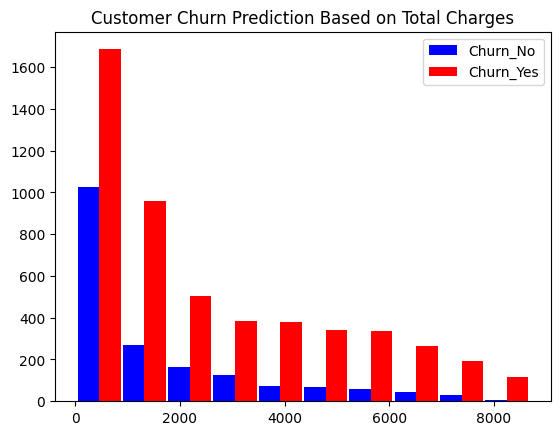

In [48]:
total_charge_churn_yes = df[df.Churn == 'Yes'].TotalCharges
total_charge_churn_no = df[df.Churn == 'No'].TotalCharges

plt.hist([total_charge_churn_yes, total_charge_churn_no], rwidth = 0.95, color = ['blue', 'red'], label = ['Churn_No', 'Churn_Yes'] )
plt.title('Customer Churn Prediction Based on Total Charges')
plt.legend()
plt.show()

In [49]:
def dataframe_unique_values (df):
    for column in df:
        if df[column].dtypes == 'object':
            print(f'{column} : {df[column].unique()}')

In [50]:
dataframe_unique_values(df)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [51]:
df.replace('No internet service', 'No', inplace=True)
df.replace('No phone service', 'No', inplace=True)
df.replace('Month-to-month', 'Monthly', inplace=True)
df['gender'].replace({'Female': 1, "Male": 0}, inplace=True)

In [52]:
dataframe_unique_values(df)

Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Monthly' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [53]:
#Encoding Yes No columns to 1 0 
columns_to_encoding = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'PaperlessBilling',
                     'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Churn']

for cols in columns_to_encoding:
    df[cols].replace({'Yes': 1, "No": 0}, inplace=True)

In [54]:
df.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6441,1,0,1,1,17,1,0,DSL,1,0,0,1,0,0,Monthly,1,Credit card (automatic),55.35,920.50,0
4760,0,0,1,1,66,1,0,DSL,1,1,1,1,1,0,One year,1,Electronic check,75.10,5013.00,0
2063,0,0,1,1,51,1,0,DSL,1,0,0,1,1,1,One year,1,Bank transfer (automatic),76.40,3966.30,0
3700,0,0,0,1,20,1,0,No,0,0,0,0,0,0,Monthly,1,Electronic check,19.40,374.50,1
5472,0,0,1,1,24,1,1,DSL,1,0,0,1,1,1,Monthly,0,Bank transfer (automatic),81.00,1923.85,0


In [55]:
df = pd.get_dummies(df,['InternetService', 'Contract', 'PaymentMethod'])
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Monthly,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1,1,0,1,...,1,0,0,0,1,0,0,0,0,1
7039,1,0,1,1,72,1,1,0,1,1,...,0,1,0,0,1,0,0,1,0,0
7040,1,0,1,1,11,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
7041,0,1,1,0,4,1,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1


In [56]:
columns_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']
scaler = MinMaxScaler()
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

In [57]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Monthly,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0.000000,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0.464789,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0.014085,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0.619718,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,0.014085,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,0.323944,1,1,1,0,1,...,1,0,0,0,1,0,0,0,0,1
7039,1,0,1,1,1.000000,1,1,0,1,1,...,0,1,0,0,1,0,0,1,0,0
7040,1,0,1,1,0.140845,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
7041,0,1,1,0,0.042254,1,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1


In [58]:
x = df.drop('Churn', axis= 'columns')
y = df.Churn.astype(np.float32)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [59]:
model = LogisticRegression()
cv = cross_val_score(model, X_train, y_train, cv = 10, scoring='r2')
model.fit(X_train, y_train)
test_score = model.score(X_test, y_test)
y_pred = model.predict(X_test)

In [60]:
test_score

0.8038379530916845

In [61]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[918 115]
 [161 213]]


In [62]:
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      0.89      0.87      1033
         1.0       0.65      0.57      0.61       374

    accuracy                           0.80      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.80      0.80      1407



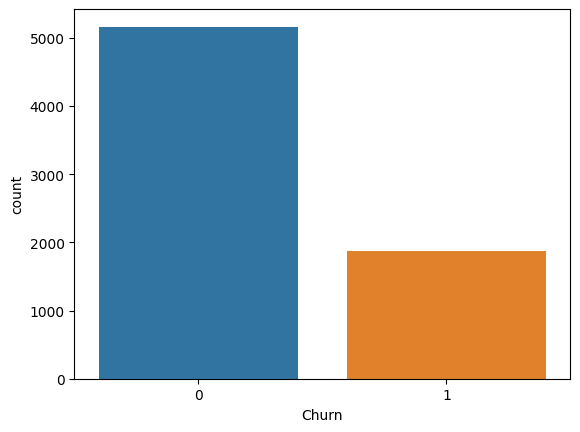

In [63]:
sns.countplot(x = 'Churn', data=df)
plt.show()

In [64]:
churn_yes = df[df['Churn']==1]
churn_no = df[df['Churn']==0]

In [65]:
no_sum = churn_no.value_counts().sum()
no_sum
yes_sum = churn_yes.value_counts().sum()
churn_ratio_yes = (yes_sum/no_sum)*100
churn_ratio_yes
print(f'churn NO  :{no_sum}')
print(f'churn YES :{yes_sum}')
print(f'percentage of churn YES : {churn_ratio_yes:.2f}%')

churn NO  :5163
churn YES :1869
percentage of churn YES : 36.20%


In [66]:
minor_class = len(churn_yes)
df_under = churn_no.sample(minor_class)
df_test_under = pd.concat([df_under, churn_yes], axis = 0)
df_test_under.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3738 entries, 4067 to 7041
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   3738 non-null   int64  
 1   SeniorCitizen                            3738 non-null   int64  
 2   Partner                                  3738 non-null   int64  
 3   Dependents                               3738 non-null   int64  
 4   tenure                                   3738 non-null   float64
 5   PhoneService                             3738 non-null   int64  
 6   MultipleLines                            3738 non-null   int64  
 7   OnlineSecurity                           3738 non-null   int64  
 8   OnlineBackup                             3738 non-null   int64  
 9   DeviceProtection                         3738 non-null   int64  
 10  TechSupport                              3738

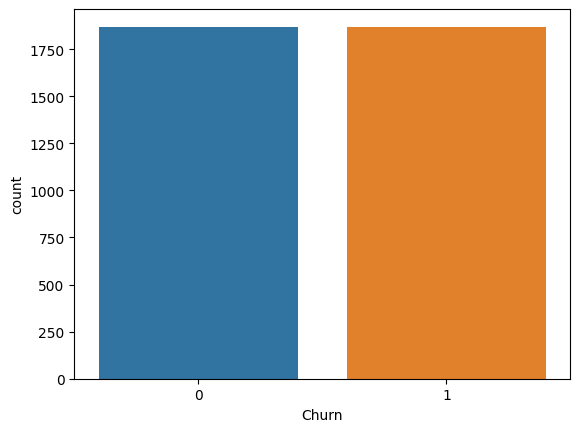

In [67]:
sns.countplot(x = 'Churn', data=df_test_under)
plt.show()

In [68]:
x = df_test_under.drop('Churn', axis= 'columns')
y = df_test_under.Churn.astype(np.float32)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)




model = LogisticRegression()
cv = cross_val_score(model, X_train, y_train, cv = 10, scoring='r2')
model.fit(X_train, y_train)
test_score = model.score(X_test, y_test)
y_pred = model.predict(X_test)

In [69]:
test_score

0.7513368983957219

In [70]:
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

         0.0       0.75      0.76      0.75       374
         1.0       0.76      0.74      0.75       374

    accuracy                           0.75       748
   macro avg       0.75      0.75      0.75       748
weighted avg       0.75      0.75      0.75       748



In [71]:
model1 = KNeighborsClassifier()

In [72]:
model1.fit(X_train, y_train)
test_score = model1.score(X_test, y_test)
y_pred = model1.predict(X_test)

In [73]:
test_score

0.7179144385026738

In [74]:
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

         0.0       0.73      0.69      0.71       374
         1.0       0.71      0.74      0.72       374

    accuracy                           0.72       748
   macro avg       0.72      0.72      0.72       748
weighted avg       0.72      0.72      0.72       748



In [75]:
svm_model = SVC()
svm_model.fit(X_train, y_train)
sv_test_score = svm_model.score(X_test, y_test)
svm_y_pred = svm_model.predict(X_test)

In [76]:
sv_test_score

0.7513368983957219

In [77]:
class_report = classification_report(y_test, svm_y_pred)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

         0.0       0.75      0.76      0.75       374
         1.0       0.75      0.75      0.75       374

    accuracy                           0.75       748
   macro avg       0.75      0.75      0.75       748
weighted avg       0.75      0.75      0.75       748

